# Introduction

In [5]:
import sys
sys.path.append('/home/gpuvmadm/PyTomography/src')
import numpy as np
from pytomography.algorithms import get_osem_net
from pytomography.metadata import PSFMeta
from pytomography.priors import QClearPrior
import matplotlib.pyplot as plt
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

1. Create OSEM reconstruction network with output data from SIMIND, using
    * attenuation correction
    * PSF modeling
    * QClear prior

In [6]:
osem_net = get_osem_net(projections_header = '/home/gpuvmadm/PyTomography/test_files/quantitative/body1t2ew6_tot_w2.hdr',
                        scatter_headers = ['/home/gpuvmadm/PyTomography/test_files/quantitative/body1t2ew6_tot_w1.hdr',
                                           '/home/gpuvmadm/PyTomography/test_files/quantitative/body1t2ew6_tot_w3.hdr'],
                        CT_header = '/home/gpuvmadm/PyTomography/test_files/quantitative/body1.hct',
                        psf_meta=PSFMeta(collimator_slope=0.03013, collimator_intercept=0.1967),
                        prior = QClearPrior(beta=1, gamma=5),
                        device=device)

2. Reconstruct object, specifying number of iterations and subsets.

In [7]:
reconstructed_object = osem_net(n_iters=10, n_subsets=8)
reconstructed_object = reconstructed_object[0].cpu().numpy()

3. Plot maximum intensity projections of the reconstructed object.

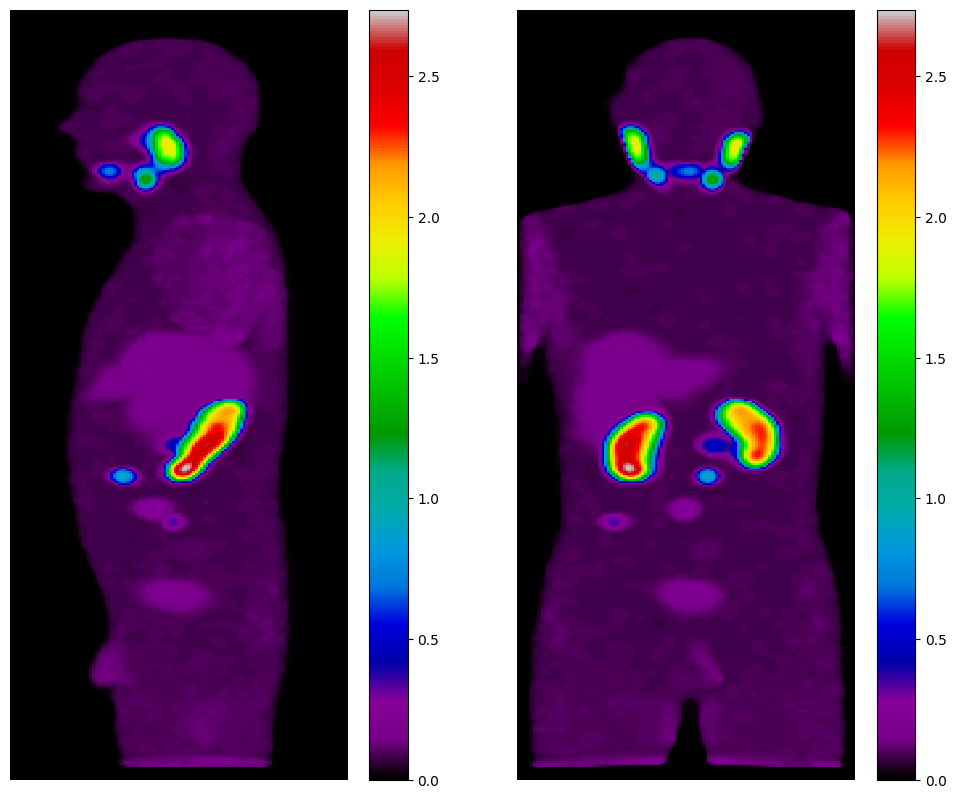

In [8]:
plt.subplots(1,2,figsize=(12,10))
plt.subplot(121)
plt.pcolormesh(reconstructed_object.max(axis=0).T, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.subplot(122)
plt.pcolormesh(reconstructed_object.max(axis=1).T, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('../images/sample_MIP.png', dpi=300, transparent=True)